In [1]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib # collection of functions for scientific and publication-ready visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\JYOTIKA\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df=pd.read_csv(r'C:\Users\JYOTIKA\Desktop\thesis\heart1.csv')

In [3]:
features= np.array(df.iloc[:,:12])
labels= df.iloc[:,-1:].values


In [4]:
qualitative = []
quantitative = []
for feature in df.columns:
    if len(df[feature].unique()) <= 8:
        qualitative.append(feature)
    else:
        quantitative.append(feature)

In [5]:
X = df.drop('target',1)
y = df['target']
print('shape of X and y respectively :', X.shape, y.shape)

shape of X and y respectively : (303, 13) (303,)


<ipython-input-5-7e0cb5034682>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('target',1)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)
#0

shape of X and y respectively (train) : (212, 13) (212,)
shape of X and y respectively (test) : (91, 13) (91,)


In [7]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
model.fit(X_train, y_train)
y_pred = model.predict(X)


In [8]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(features,y_pred,test_size=0.30)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
k=[i for i in range(1,30)]
print(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [11]:
from sklearn.metrics import accuracy_score
accuracy=[]
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X1_train, y1_train)
    y1_pred = knn.predict(X1_test)
    accuracy.append(accuracy_score(y1_test, y1_pred))

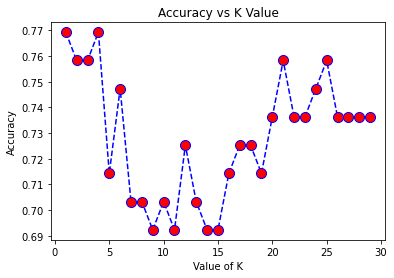

In [12]:
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K Value")
plt.plot(k,accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

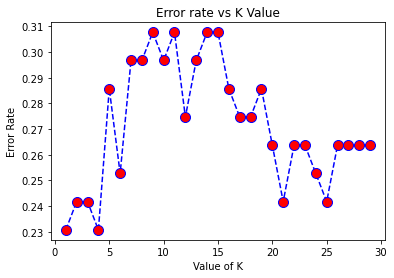

In [13]:
error=[(1-i) for i in accuracy]
plt.xlabel("Value of K")
plt.ylabel("Error Rate")
plt.title("Error rate vs K Value")
plt.plot(k,error,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X1_train, y1_train)
y_pred = knn.predict(X1_test)
print("Accuracy:",accuracy_score(y1_test, y1_pred))

Accuracy: 0.7362637362637363


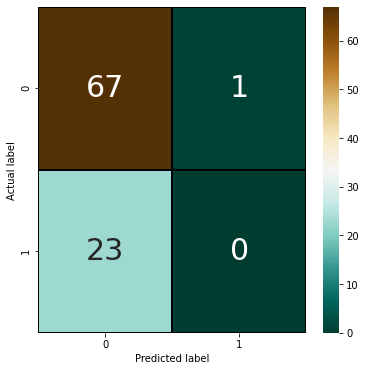

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test, y1_pred)
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True,cmap='BrBG_r',linewidths=1, linecolor='black',annot_kws={"size": 30})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [16]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Accuracy for the hybrid model:',(TP+TN)/(TP+TN+FN+FP))
print('Sensitivity for the hybrid model:',(TP/(TP+FN)))
print('Specificity for the hybrid model:',(TN/(TN+FP)))
print('Precision for the hybrid model:',(TP/(TP+FP)))

Accuracy for the hybrid model: 0.7362637362637363
Sensitivity for the hybrid model: 0.7444444444444445
Specificity for the hybrid model: 0.0
Precision for the hybrid model: 0.9852941176470589
